# Illustrations for Presentation 

In [28]:
from src.data.create_simulated_data import SimulateData
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np 
import pickle 
import pywt 
import os 

sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 7,
    'xtick.labelsize': 5,
    'ytick.labelsize': 5,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/other/"
def savefig(fig, name, width=6, height=4, format = "pdf"):
    # apply rcParams
    fig.set_size_inches(width, height)
    dpi = 1000 if format == "png" else 'figure'
    fig.savefig(figdir + name + "." + format, bbox_inches='tight', dpi = dpi)


### Wavelets

**Mother + Daughter Wavelet**

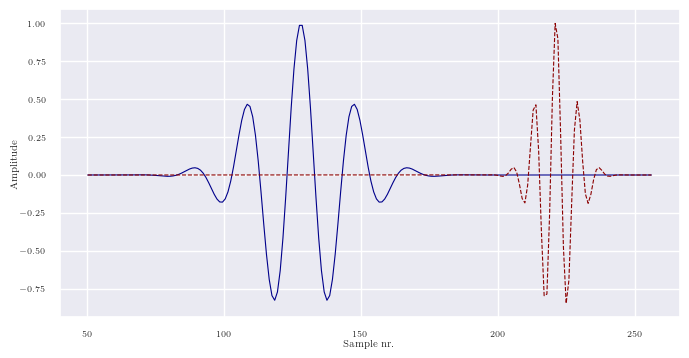

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define the mother wavelet (Morlet)
wavelet = pywt.ContinuousWavelet('morl')
mother_wavelet = np.real(wavelet.wavefun()[0])
t = np.linspace(0, len(mother_wavelet), len(mother_wavelet))

# Define scaling and translation
scale = 0.4  # Scaling factor
translation = 170  # Translation factor

# Compute the daughter wavelet (scaled and translated)
daughter_wavelet = (1 / np.sqrt(scale)) * np.interp((t - translation) / scale, t, mother_wavelet)
daughter_wavelet = daughter_wavelet / np.max(daughter_wavelet)

# Plot both wavelets
fig = plt.figure(figsize=(8, 4))
plt.plot(t[t > 50], mother_wavelet[t > 50], color='darkblue', linewidth = 0.8)
plt.plot(t[t > 50], daughter_wavelet[t > 50], linestyle='dashed', color='darkred', linewidth = 0.8)
plt.xlabel("Sample nr.")
plt.ylabel("Amplitude")
plt.show()

savefig(fig, "daughter_wavelet", width = 2.7, height = 1.2)

**Coefficient**

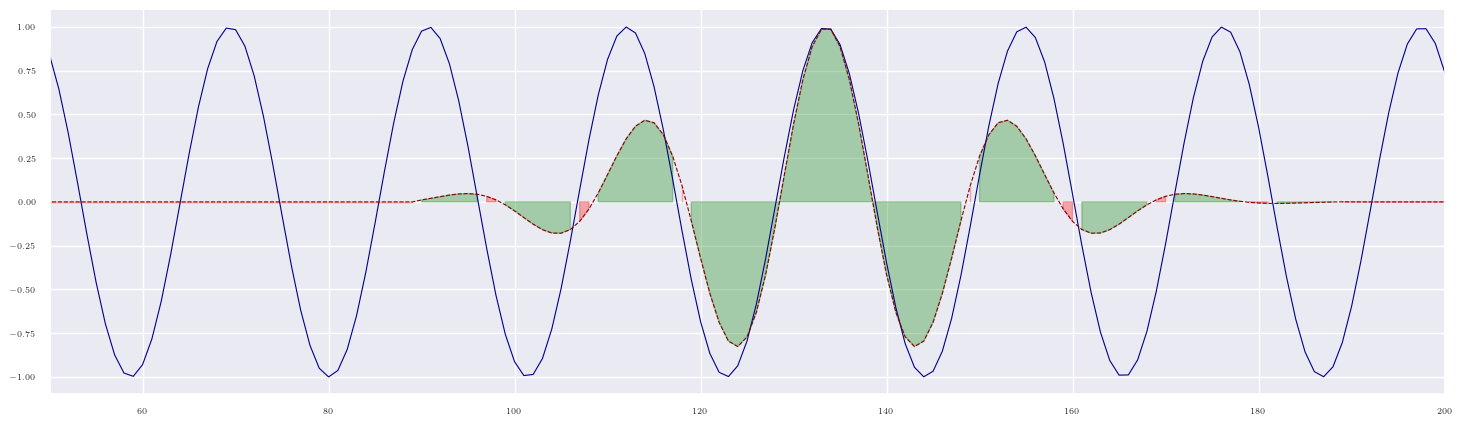

In [145]:
N = len(mother_wavelet)
sine_wave = np.sin(np.linspace(0, N*0.3, N+6))

wavelet_padded = np.r_[np.zeros(6), mother_wavelet]
wavelet_padded[:90] = 0 
wavelet_padded[190:] = 0 

# Identify regions where the Morlet wavelet is positive
wavelet_positive = np.abs(wavelet_padded) > 0.0000000001

# Determine where the signs match and differ (only when wavelet is positive)
# same_sign = (sine_wave > 0) & wavelet_positive 
# opposite_sign = (sine_wave < 0) & wavelet_positive

same_sign = ((sine_wave > 0) & (wavelet_padded > 0)) | ((sine_wave < 0) & (wavelet_padded < 0))
opposite_sign = ~same_sign

# Plot the sine wave and wavelet
fig = plt.figure(figsize=(18, 5))
plt.plot(sine_wave, color="darkblue", label="Sine Wave", linewidth = 0.8)
plt.plot(wavelet_padded, "--", color="darkred", label="Morlet Wavelet", linewidth = 0.8)

# Fill areas based on sign agreement
plt.fill_between(range(len(sine_wave)), np.zeros(len(sine_wave)), wavelet_padded, where=same_sign, color='green', alpha=0.3)
plt.fill_between(range(len(sine_wave)), np.zeros(len(sine_wave)), wavelet_padded, where=opposite_sign, color='red', alpha=0.3)
plt.xlim([50, 200])
plt.show()

savefig(fig, "coefficients_similarity", width = 4, height = 1.2)

### The mean method 

In [147]:
sns.reset_orig()

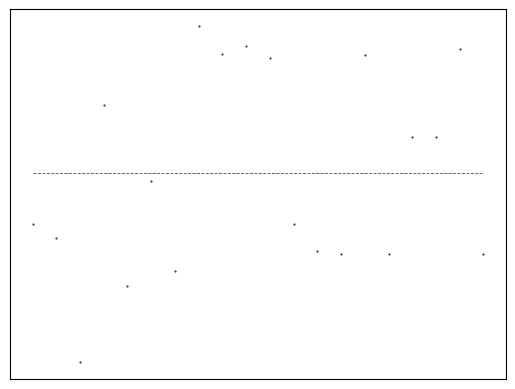

In [153]:
N = 20 
sample = np.random.random(size = N)
mu = np.mean(sample)

fig = plt.figure()
plt.scatter(np.arange(N), sample, color = "black", s = 0.2)
plt.plot(np.ones(N) * mu, "--", color = "red", linewidth = 0.6)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "overview_method0", width=1.5, height=0.5, format = "png")

### SVR time 

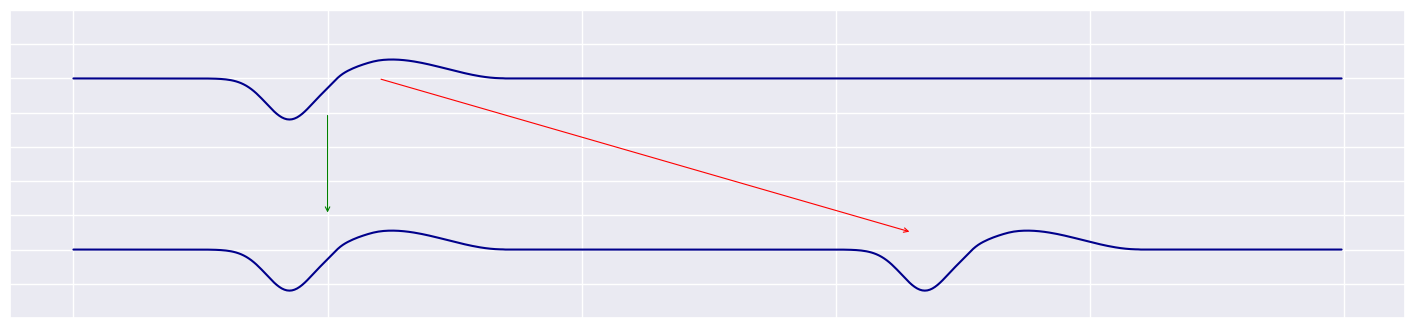

In [3]:
np.random.seed(seed = 1)
os.chdir("../data/")

simulator = SimulateData()
cap1 = simulator.get_CAP(4)
cap2 = simulator.get_CAP(3)

time_segment1 = np.zeros(500)
time_segment1[50:50+len(cap1)] = cap1 

time_segment2 = np.zeros(500)
time_segment2[50:50+len(cap1)] = cap1 
time_segment2[300:300+len(cap1)] = cap1

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
ax.plot(time_segment1 + 5, color = "darkblue")
ax.plot(time_segment2, color = "darkblue")

ax.annotate(
    '', xy=(100, 1), xytext=(100, 4),
    arrowprops=dict(arrowstyle='->', color='green', lw=0.8)
)

ax.annotate(
    '', xy=(330, 0.5), xytext=(120, 5),
    arrowprops=dict(arrowstyle='->', color='red', lw=0.8)
)
ax.set_ylim([-2, 7])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()


os.chdir("../visualizations")
savefig(fig, "svr_time_problem", width = 4, height = 1.6)

### Preprocessing 

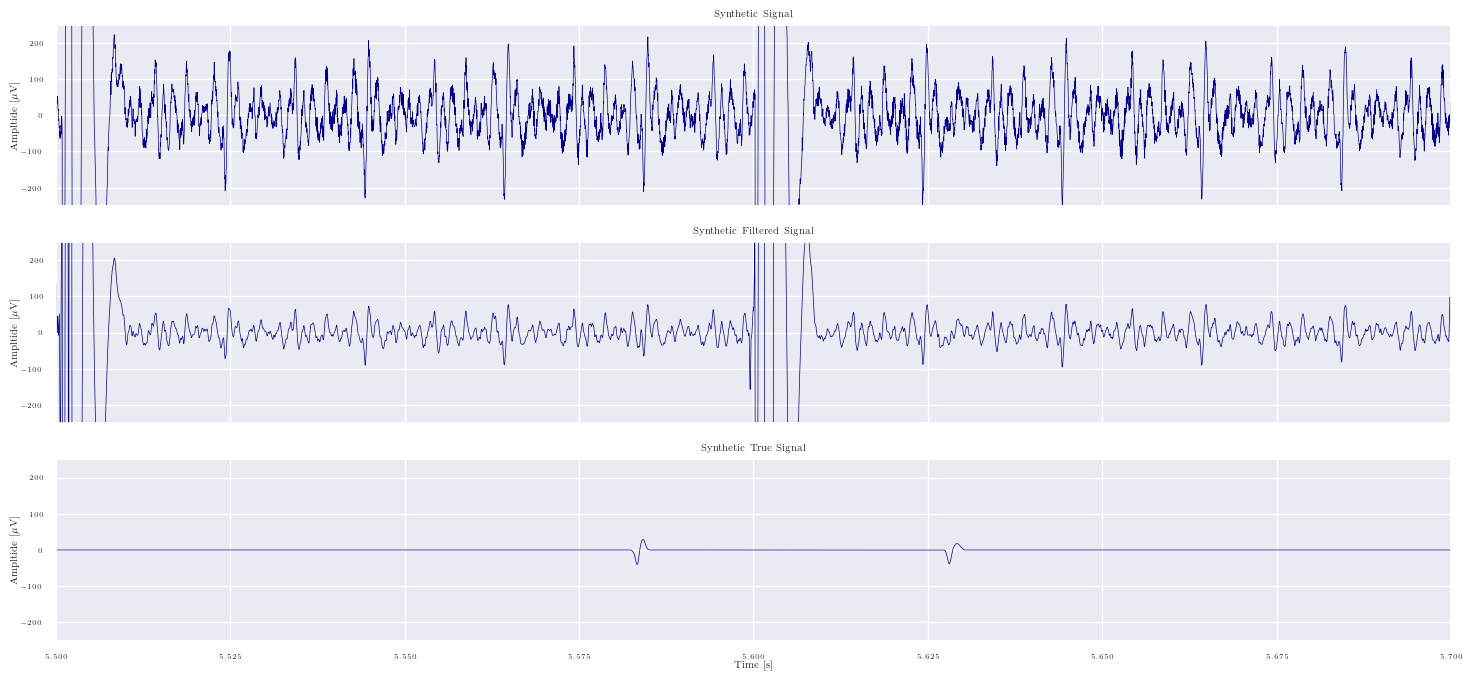

In [29]:
with open("simulated_data.pkl", "rb") as f: 
    data = pickle.load(f)
f.close()

obs_signal = data['obs_signal']
fil_signal = data['filt_signal']
true_signal = data['true_signal']

x_axis = np.arange(len(obs_signal))  / 30000 
channel = 5
fig, ax = plt.subplots(3, 1, figsize = (18, 8), sharey = True, sharex=True)
ax[0].plot(x_axis, obs_signal[:, channel], color = "darkblue", linewidth = 0.5)
ax[0].set_title("Synthetic Signal")

ax[1].plot(x_axis, fil_signal[:, channel], color = "darkblue", linewidth = 0.5)
ax[1].set_title("Synthetic Filtered Signal")

ax[2].plot(x_axis, true_signal[:, channel], color = "darkblue", linewidth = 0.5)
ax[2].set_xlabel("Time [s]")
ax[2].set_title("Synthetic True Signal")

[a.set_ylabel(r"Ampltide [$\mu$V]") for a in ax]
[a.set_xlim([5.5, 5.7]) for a in ax]
[a.set_ylim([-250, 250]) for a in ax]
plt.show()

savefig(fig, "preprocessing_bad", width = 7, height = 3)